# Statistiques projet Annotamed à l'aide d'INCEpTALYTICS

The _INCEpTALYTICS_ package allows you to export and analyse annotation projects using the [_INCEpTION_](https://inception-project.github.io/) annotation tool. 
This guide gives an overview over its functionalities. It assumes that you are familiar with the INCEpTION annotation tool.

## Chargement du projet Annotamed

* Import d'un [fichier zippé XMI](https://inception-project.github.io/releases/22.4/docs/user-guide.html#sect_formats_uimaxmi) exporté d'Inception

***NOTE***: XMI exports must be in XMI v1.0 format, as INCEpTALYTICS is built on top of [_dkpro cassis_](https://github.com/dkpro/dkpro-cassis).

Installer la librairie inceptalytics

In [3]:
# %pip install inceptalytics

In [4]:
from inceptalytics import Project
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
# Ignore inceptalytics warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
project = Project.from_zipped_xmi('../data/annotamed9828978513773495996.zip')

Once a project is loaded, you can access different properties such as annotators and annotated files. 
Per default, those include only annotators who annotated at least a single document and documents that contain at least a single annotation.

In [26]:
print('Annotateurs :', project.annotators)

file_names =  project.source_file_names

# Les documents annotés au moins par 1 annotateur
file_names_all = file_names[:38]

# Les 9 documents annotés par 3 annotateurs 
file_names_3_annotators = file_names[:9]

print('Nos layers:', [el for el in project.layers if "custom" in el])

Annotateurs : ['CURATION_USER', 'INITIAL_CAS', 'AV00440', 'AS00020', 'AC30300', 'AR41550', 'AU90360', 'AV45040']
Nos layers: ['webanno.custom.EntitsUMLS', 'webanno.custom.Relation']


## Analyse de nos annotations

Annotations are organised in _layers_ and _features_. To analyse a specific annotation, you need to select a feature-layer combination. The returned _View_ offers the main analysis functionalities of INCEpTALYTICS.

In [28]:
# Layers custom de notre projet 
umls_layer= 'webanno.custom.EntitsUMLS'
relations_layer = 'webanno.custom.Relation'
print(f'Features umls: {project.features(umls_layer)}')
print(f'Features relations: {project.features(relations_layer)}')

# Features de nos layers
feature_umls = 'UMLSCUI'
feature_umls_types_semantiques = 'Typesmantique'
feature_relation = 'Typederelation'

feature_path_umls = f'{umls_layer}>{feature_umls}'
feature_path_umls_types_semantiques = f'{umls_layer}>{feature_umls_types_semantiques}'
feature_path_relations = f'{relations_layer}>{feature_relation}'

Features umls: ['UMLSCUI', 'Typesmantique']
Features relations: ['Dependent', 'Governor', 'Typederelation']


Views reduite à nos 3 annotateurs

In [ ]:
umls_annos = project.select(annotation=feature_path_umls,
                            annotators=['AS00020', 'AC30300', 'AR41550'],
                            source_files=file_names_all)

umls_annos_types_semantiques = project.select(annotation=feature_path_umls_types_semantiques,
                            annotators=['AS00020', 'AC30300', 'AR41550'],
                            source_files=file_names_all)

relations_annos = project.select(annotation=feature_path_relations,
                                 annotators=['AS00020', 'AC30300', 'AR41550'],
                            source_files=file_names_all)

# Views réduite à nos 9 documents annotés par 3 annotateurs
reduced_umls_annos = project.select(annotation=feature_path_umls,
                                   annotators=['AS00020', 'AC30300', 'AR41550'],
                                   source_files=file_names_3_annotators)

reduced_umls_annos_types_semantiques = project.select(annotation=feature_path_umls_types_semantiques,
                                   annotators=['AS00020', 'AC30300', 'AR41550'],
                                   source_files=file_names_3_annotators)

reduced_relations_annos = project.select(annotation=feature_path_relations,
                                   annotators=['AS00020', 'AC30300', 'AR41550'],
                                   source_files=file_names_3_annotators)

## Statistiques du projet
### 1. Corpus total de documents annotés par au moins 1 annotateur

- Nombre d'annotateurs : 3
- Nombre de documents : 38

### 1.1. Total d'annotations

In [9]:
print('CUI UMLS annotés:', umls_annos.count())
print('Relations annotées:', relations_annos.count())

CUI UMLS annotés: 690
Relations annotées: 53


### 1.2. Layer Entité UMLS

In [10]:
print('Total annotations par annotateur : \n', umls_annos.count(grouped_by=['annotator']))

Total annotations par annotateur : 
 annotator
AC30300     54
AR41550    467
AS00020    169
Name: annotation, dtype: int64


### 2. Corpus réduit aux documents annotés par les 3 annotateurs
- Nombre d'annotateurs : 3
- Nombre de documents : 9
### 2.1. Total d'annotations

In [11]:
print('Entités UMLS annotés:', reduced_umls_annos.count())
print('Relations annotées:', reduced_relations_annos.count())

Entités UMLS annotés: 271
Relations annotées: 45


### 2.2. Layer Entité UMLS

In [12]:
print('Total annotations par annotateur : \n', reduced_umls_annos.count(grouped_by=['annotator']))

Total annotations par annotateur : 
 annotator
AC30300     54
AR41550     93
AS00020    124
Name: annotation, dtype: int64


### 2.3. Layer Relations

In [13]:
print('Total de relations annotées : \n', reduced_relations_annos.count(grouped_by='annotation'))
print("====================================")
print('Annotations par annotateurr par type de relation : \n', reduced_relations_annos.count(grouped_by=['annotator','annotation']))
print("====================================")
print('Total nnotations par annotateur : \n', reduced_relations_annos.count(grouped_by=['annotator']))


Total de relations annotées : 
 annotation
Cause Effet         33
Traitement Effet    12
Name: annotation, dtype: int64
Annotations par annotateurr par type de relation : 
 annotator  annotation      
AC30300    Cause Effet          7
           Traitement Effet     9
AR41550    Cause Effet         15
AS00020    Cause Effet         11
           Traitement Effet     3
Name: annotation, dtype: int64
Total nnotations par annotateur : 
 annotator
AC30300    16
AR41550    15
AS00020    14
Name: annotation, dtype: int64


### Inspecting Data in Detail

To get an overview over the annotation, you can look at the document-annotator matrix.

In [14]:
reduced_umls_annos.document_annotator_matrix

annotator                                      AC30300   AR41550   AS00020
source_file  sentence             begin end                               
27121486.txt 27121486.txt_0-121   21    25    C0752931       NaN       NaN
                                  48    58         NaN  C1366529  C1366529
                                  69    73    C0879590       NaN  C1334098
                                  78    83    C1334098       NaN  C1334098
                                  101   121   C0020443  C0020443  C0020443
...                                                ...       ...       ...
27317610.txt 27317610.txt_83-1971 1828  1849  C1397856  C1397856  C1397856
                                  1959  1970       NaN  C2832047       NaN
                                  1967  1970  C0876926       NaN  C0876926
27338437.txt 27338437.txt_0-84    66    75         NaN  C0004096  C0004096
             27338437.txt_86-1483 149   170        NaN  C1301752  C1301752

[175 rows x 3 columns]

It may be useful to have a look at the text that was annotated to adjudicate disagreements.

In [15]:
document_annotator_matrix = reduced_umls_annos.document_annotator_matrix
covered_texts = reduced_umls_annos.texts
document_annotator_matrix.join(covered_texts).head()

AC30300   AR41550  \
source_file  sentence           begin end annotator                       
27121486.txt 27121486.txt_0-121 21    25  AC30300    C0752931       NaN   
                                48    58  AS00020         NaN  C1366529   
                                          AR41550         NaN  C1366529   
                                69    73  AS00020    C0879590       NaN   
                                          AC30300    C0879590       NaN   

                                                      AS00020        text  
source_file  sentence           begin end annotator                        
27121486.txt 27121486.txt_0-121 21    25  AC30300         NaN        XspI  
                                48    58  AS00020    C1366529  LDL-R Gene  
                                          AR41550    C1366529  LDL-R Gene  
                                69    73  AS00020    C1334098        IL-2  
                                          AC30300    C1334098        IL-2

If you are looking for annotation quality, we also provide confusion matrices and agreement measures. Confusion matrices produced pairwise and are indexed by annotators.

In [16]:
cms = reduced_umls_annos.confusion_matrices()
cms

a        b      
AS00020  AC30300    AC30300   C0002607  C0004096  C0004153  C00049...
         AR41550    AR41550   C0002607  C0004096  C0004153  C00049...
AC30300  AR41550    AR41550   C0002607  C0004096  C0004153  C00049...
Name: confusion_matrix, dtype: object

If you are not interested in individual annotators, but overall disagreements over certain classes, you can aggregate the pairwise matrices into a single matrix.

In [17]:
# sum over all pairwise matrices
print(reduced_umls_annos.confusion_matrices(aggregate='total'))

          C0002607  C0004096  C0004153  C0004936  C0010124  C0017710  \
C0002607         0         0         0         0         0         0   
C0004096         0         1         0         0         0         0   
C0004153         0         0         1         0         0         0   
C0004936         0         0         0         3         0         0   
C0010124         0         0         0         0         3         0   
C0017710         0         0         0         0         0         1   
C0020443         0         0         0         0         0         0   
C0020663         0         0         0         0         0         0   
C0023820         0         0         0         0         0         0   
C0023822         0         0         0         0         0         0   
C0023823         0         0         0         0         0         0   
C0023824         0         0         0         0         0         0   
C0024765         0         0         0         0         0      

If you want to quantify disagreements, INCEpTALYTICS offers different agreement measures which can be calculated pairwise or in aggregate.

In [18]:
print('Krippendorff\'s alpha: ', reduced_umls_annos.iaa())
print(reduced_umls_annos.iaa_pairwise(measure='kappa'))

Krippendorff's alpha:  0.8439892406372853
                  n     kappa
a       b                    
AS00020 AC30300  24  0.904950
        AR41550  71  0.821196
AC30300 AR41550  18  1.000000


In [19]:
reduced_umls_annos = project.select(annotation=feature_path_umls,
                                   annotators=['AS00020', 'AC30300', 'AR41550'],
                                   source_files=file_names_3_annotators)

In [20]:
df1 = reduced_umls_annos
df1 = df1.document_annotator_matrix
columns_to_encode = ['AC30300','AR41550','AS00020']
all_values = pd.concat([df1[col] for col in columns_to_encode])
all_values

source_file   sentence              begin  end 
27121486.txt  27121486.txt_0-121    21     25      C0752931
                                    48     58           NaN
                                    69     73      C0879590
                                    78     83      C1334098
                                    101    121     C0020443
                                                     ...   
27317610.txt  27317610.txt_83-1971  1828   1849    C1397856
                                    1959   1970         NaN
                                    1967   1970    C0876926
27338437.txt  27338437.txt_0-84     66     75      C0004096
              27338437.txt_86-1483  149    170     C1301752
Length: 525, dtype: object

In [21]:
df_annotator_matrix = reduced_umls_annos.document_annotator_matrix
df_annotator_matrix = df_annotator_matrix.fillna('Missing')


df_annotator_matrix

annotator                                      AC30300   AR41550   AS00020
source_file  sentence             begin end                               
27121486.txt 27121486.txt_0-121   21    25    C0752931   Missing   Missing
                                  48    58     Missing  C1366529  C1366529
                                  69    73    C0879590   Missing  C1334098
                                  78    83    C1334098   Missing  C1334098
                                  101   121   C0020443  C0020443  C0020443
...                                                ...       ...       ...
27317610.txt 27317610.txt_83-1971 1828  1849  C1397856  C1397856  C1397856
                                  1959  1970   Missing  C2832047   Missing
                                  1967  1970  C0876926   Missing  C0876926
27338437.txt 27338437.txt_0-84    66    75     Missing  C0004096  C0004096
             27338437.txt_86-1483 149   170    Missing  C1301752  C1301752

[175 rows x 3 columns]

In [22]:
# Fonction pour vérifier l'accord inter-annotateur (1, 2 ou 3)
def verifier_accord(row):
    # Compter combien de valeurs uniques il y a parmi les annotations
    unique_values = len(set([row['AC30300'], row['AR41550'], row['AS00020']]))
    if unique_values == 1:
        return 3/3  # Tous les annotateurs sont en accord
    elif unique_values == 2:
        return 2/3  # Deux annotateurs sont en accord
    else:
        return 0  # Pas d'accord

def convert_to_binary_matrix(df):
    print(1)

df_annotator_matrix['Accord'] = df_annotator_matrix.apply(verifier_accord, axis=1)
df_annotator_matrix["cumulative_sum"] = df_annotator_matrix["Accord"].cumsum()

print("Entente proportionnelle : "+ str(df_annotator_matrix["Accord"].value_counts()[1]/len(df_annotator_matrix)))

Entente proportionnelle : 0.09142857142857143


In [23]:
df_annotator_binary = df_annotator_matrix[['AC30300', 'AR41550', 'AS00020']].map(lambda x: 0 if x == "Missing" else 1)
df_annotator_binary 


def sum_row(row):
    return(np.sum([row['AC30300'],row['AR41550'], row['AS00020']]))
    
def sum_null(row):
    return(3 - np.sum([row['AC30300'],row['AR41550'], row['AS00020']]))

# Nombre d'annotateurs ayant ayant identifé un concept dans l'interval
df_annotator_binary["Class1"] = df_annotator_binary.apply(sum_row, axis=1)
# Nombre d'annotateurs n'ayant pas identifié de concept dans l'interval
df_annotator_binary["Class2"] = df_annotator_binary.apply(sum_null, axis=1)

df_annotator_binary


annotator                                     AC30300  AR41550  AS00020  \
source_file  sentence             begin end                               
27121486.txt 27121486.txt_0-121   21    25          1        0        0   
                                  48    58          0        1        1   
                                  69    73          1        0        1   
                                  78    83          1        0        1   
                                  101   121         1        1        1   
...                                               ...      ...      ...   
27317610.txt 27317610.txt_83-1971 1828  1849        1        1        1   
                                  1959  1970        0        1        0   
                                  1967  1970        1        0        1   
27338437.txt 27338437.txt_0-84    66    75          0        1        1   
             27338437.txt_86-1483 149   170         0        1        1   

annotator                                     Class1  Class2  
source_file  sentence             begin end                   
27121486.txt 27121486.txt_0-121   21    25         1       2  
                                  48    58         2       1  
                                  69    73         2       1  
                                  78    83         2       1  
                                  101   121        3       0  
...                                              ...     ...  
27317610.txt 27317610.txt_83-1971 1828  1849       3       0  
                                  1959  1970       1       2  
                                  1967  1970       2       1  
27338437.txt 27338437.txt_0-84    66    75         2       1  
             27338437.txt_86-1483 149   170        2       1  

[175 rows x 5 columns]

Kappa de Fleiss pour déterminer l'entente inter-annotateur sur la "ce segment contient une entité médicale ou non"

N = nombre de lignes (entités annotées).

n = nombre d'annotateurs.

k = nombre de catégories possibles (dans notre cas, 2 : "annoté" = 1, "non annoté" = 0).

nijnij​ = nombre d’annotateurs qui ont choisi la catégorie j pour l’entité i.

In [24]:
# Nombres d'entitéss annotées
N = len(df_annotator_binary)
print(N)
# Nombre d'annotateurs
n = 3
print(n)
# Nombre de catégories
k = 2

P_i = []
for index, row in df_annotator_binary.iterrows():
    # Nombre d'annotateurs ayant identifié un concept scientifique dans l'interval
    n_1 = row["Class1"]
    # Nombre d'annotateurs qui n'ont pas annoté dans l'interval
    n_0 = row["Class2"]
    # the extent to which raters agree for the i-th element 
    # (i.e., compute how many rater-rater pairs are in agreement, relative to the number of all possible rater-rater pairs)
    P = (n_1**2 + n_0**2 - n) / (n * (n - 1))
    P_i.append(P)

P_bar = np.mean(P_i)  # Moyenne des Pi

# Proportion des intervales de textes ayant été identifié par un CUI
p_1 = df_annotator_binary["Class1"].sum() / (N * n)  # Proportion d'annotations "1"
p_0 = 1 - p_1

# Accord attendu
P_e = p_1**2 + p_0**2 
print(P_e)

# Calcul du kappa
kappa = (P_bar - P_e) / (1 - P_e)

print("Fleiss Kappa : " +  str(kappa))

175
3
0.5005242630385488
Fleiss Kappa : -0.20507307435279062


On interprète notre résultat à partir de ce tableau :

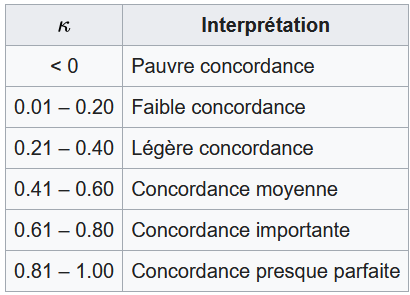

Nous avons donc une pauvre concordance inter-annotateur concernant le choix de l'annotation des termes scientifiques

In [ ]:
df_annotator_matrix_semantique = reduced_umls_annos_